销售数据（按天）（按月）统计分析

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#导入数据表
df = pd.read_excel("D:/ProgramData/data/JDdata/data/销售表.xlsx")
df = df[["日期","销售码洋"]]
#将日期转为日期格式
df["日期"] = pd.to_datetime(df['日期'])
#设置日期为索引
df1 = df.set_index('日期',drop=True)
#重新采样分组
df1_d = df1.resample("D").sum().to_period('D')
df1_m = df1.resample("M").sum().to_period('M')
df1_d.to_excel("D:/ProgramData/data/JDdata/data/res1.xlsx")
df1_m.to_excel("D:/ProgramData/data/JDdata/data/res2.xlsx")

数据可视化

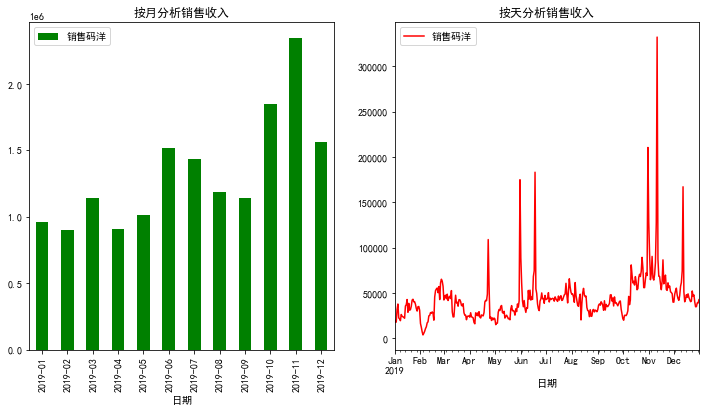

In [51]:
plt.rc('font',family = 'SimHei',size = 10)
fig = plt.figure(figsize=(12,7),facecolor = 'white')

#设置一行两列的子图，共1*2
ax = fig.subplots(1,2)

ax[0].set_title('按月分析销售收入')
ax[1].set_title('按天分析销售收入')

df1_m.plot(ax=ax[0],kind='bar',color = 'g')
df1_d.plot(ax=ax[1],color = 'r')

#调整图标距离上部和底部的空白
plt.subplots_adjust(top =0.8,bottom = 0.15)
plt.show()

后面我们研究投放的广告费用是否与销量存在相关关系，如果有相关关系的话，我们可以利用投放的广告费用预测销售量

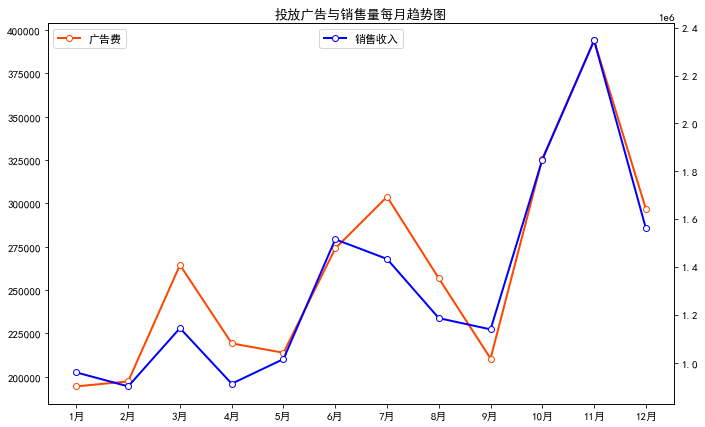

In [65]:
df1 = pd.read_excel("D:/ProgramData/data/JDdata/data/广告费.xlsx")
df2 = pd.read_excel("D:/ProgramData/data/JDdata/data/销售表.xlsx")

#数据处理
df1["投放日期"] = pd.to_datetime(df1["投放日期"])
df1 = df1.set_index('投放日期',drop=True)
df2 = df2[["日期","销售码洋"]]
df2["日期"] = pd.to_datetime(df2["日期"])
df2 = df2.set_index('日期',drop=True)

#按照月份进行重新采样
df1_x = df1.resample('M').sum().to_period('M')
df2_x = df2.resample('M').sum().to_period('M')

#把纵坐标需要的数据整理出来
y1 = pd.DataFrame(df1_x['支出'])
y2 = pd.DataFrame(df2_x['销售码洋'])

#---------------------------------------数据可视化--------------------------------------------
#生成画布
fig = plt.figure(figsize = (12,7),facecolor='white')
#图表的字体设为黑体，字号11
plt.rc('font',family = 'SimHei',size = 11)
#添加子图对象
ax = fig.add_subplot(111)
plt.title('投放广告与销售量每月趋势图')
#x轴刻度
x = [1,2,3,4,5,6,7,8,9,10,11,12]
plt.xticks(x,['1月','2月','3月','4月','5月','6月','7月','8月','9月','10月','11月','12月'])
ax.plot(x,y1,color = 'orangered',linewidth = 2,linestyle='-',marker='o',mfc='w',label='广告费')
#图例
plt.legend(loc = 'upper left')
#添加一个坐标轴
ax2 = ax.twinx()
ax2.plot(x,y2,color = 'b',linewidth = 2,linestyle='-',marker='o',mfc='w',label='销售收入')
#图例
plt.legend(loc = 'upper center')
#调整图标距离上部与底部的空白
plt.subplots_adjust(right=0.85)
plt.show()

从上图可以发现，两者的走向基本相同。我们还可以做销量与广告费的散点图验证这一点

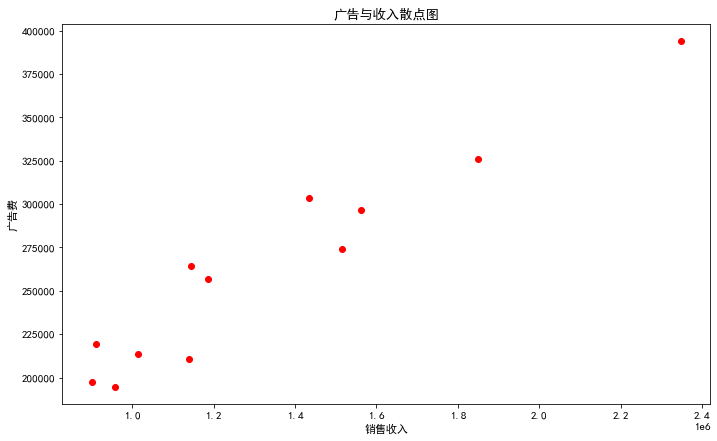

In [66]:
df1 = pd.read_excel("D:/ProgramData/data/JDdata/data/广告费.xlsx")
df2 = pd.read_excel("D:/ProgramData/data/JDdata/data/销售表.xlsx")

#数据处理
df1["投放日期"] = pd.to_datetime(df1["投放日期"])
df1 = df1.set_index('投放日期',drop=True)
df2 = df2[["日期","销售码洋"]]
df2["日期"] = pd.to_datetime(df2["日期"])
df2 = df2.set_index('日期',drop=True)

#按照月份进行重新采样
df1_x = df1.resample('M').sum().to_period('M')
df2_x = df2.resample('M').sum().to_period('M')

x = pd.DataFrame(df2_x)
y = pd.DataFrame(df1_x)

plt.figure(figsize=(12,7),facecolor='white')
plt.rc('font',family = 'SimHei',size = 11)
plt.title('广告与收入散点图')
plt.scatter(x,y,color = 'r')
plt.xlabel('销售收入')
plt.ylabel('广告费')
plt.subplots_adjust(left = 0.15)
plt.show()

可以看出，广告费与销售收入在一个线条区域上，基本可以判定两者之间存在相关关系。  
之后我们可以利用线性回归方程，通过投放的广告费用预测销售量。

c:\Users\12562\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\12562\AppData\Roaming\Python\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 30005 (\N{CJK UNIFIED IDEOGRAPH-7535}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\12562\AppData\Roaming\Python\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 21830 (\N{CJK UNIFIED IDEOGRAPH-5546}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\12562\AppData\Roaming\Python\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 38144 (\N{CJK UNIFIED IDEOGRAPH-9500}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\12562\AppData\Roaming\Python\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarn

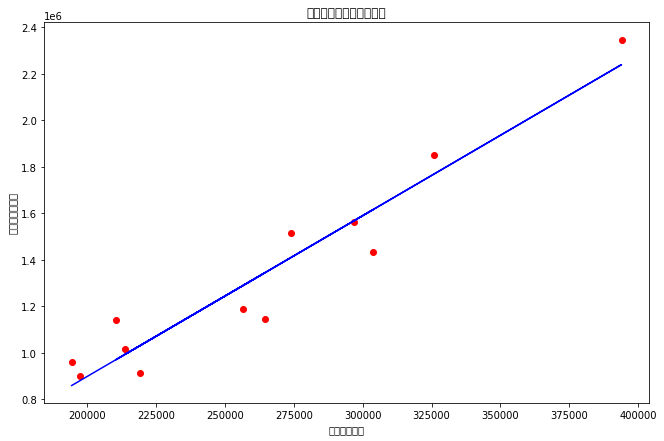

In [5]:
from sklearn import linear_model

df1 = pd.read_excel("D:/ProgramData/data/JDdata/data/广告费.xlsx")
df2 = pd.read_excel("D:/ProgramData/data/JDdata/data/销售表.xlsx")

#数据处理
df1["投放日期"] = pd.to_datetime(df1["投放日期"])
df1 = df1.set_index('投放日期',drop=True)
df2 = df2[["日期","销售码洋"]]
df2["日期"] = pd.to_datetime(df2["日期"])
df2 = df2.set_index('日期',drop=True)

#按照月份进行重新采样
df_x = df1.resample('M').sum().to_period('M')
df_y = df2.resample('M').sum().to_period('M')

x = pd.DataFrame(df_x['支出'])
y = pd.DataFrame(df_y['销售码洋'])
y

#__________________________________---线性预测---__________________________________
# 创建线性模型
clf = linear_model.LinearRegression()
clf.fit(x,y)
#K值(回归系数)
k = clf.coef_
#截距项
b = clf.intercept_
#未来六个月计划投放的广告费用
x0 = np.array([120000,130000,150000,180000,200000,250000])
#数组重塑
x0 = x0.reshape(6,1)
#用6个月的广告费预测销售量
y0 = clf.predict(x0)
#适用线性回归模型预测y值
y_pred = clf.predict(x)
plt.figure(figsize=(12,7),facecolor='white')
plt.title("电商销售数据分析与预测")
plt.rc('font',family = 'SimHei',size = 11)
plt.scatter(x,y,color = 'r')
plt.plot(x,y_pred,color = 'blue',linewidth = 1.5)
plt.ylabel(u'销售收入（元）')
plt.xlabel(u'广告费（元）')
plt.subplots_adjust(left=0.2)
plt.show()

In [73]:
#回归方程的回归系数K，截距b，以及预测值y_pred
print(k)
print(b)
print(y_pred)

[[6.92235616]]
[-487521.71147034]
[[ 858475.06576021]
 [ 878473.75271785]
 [1343012.30781197]
 [1030080.2750645 ]
 [ 992644.17292986]
 [1409093.11975303]
 [1615510.85820582]
 [1289772.46655504]
 [ 969627.33868473]
 [1767408.11951135]
 [2239318.98392007]
 [1566860.53908558]]


In [72]:
#预测的评分值
from sklearn.metrics import r2_score
y_true = [360000,450000,600000,800000,920000,1300000]
score = r2_score(y_true,y0)
score

0.9839200886906196